In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('Cleaned_Housing_Data_v3.csv')

In [4]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,12.309987,0.50,0.08,0.351072,0.466447,0.0,0.0,0.5,0.4,0.376727,0.000000,0.361635,0.0,0.893939,0.571498,0.217608,0.441078,0.462941
1,1,13.195616,0.50,0.28,0.586935,0.503833,0.4,0.0,0.5,0.4,0.574809,0.082988,0.329309,0.4,0.626263,0.908959,0.166113,0.525634,0.512823
2,2,12.100718,0.25,0.08,0.221781,0.549846,0.0,0.0,0.5,0.3,0.237989,0.000000,0.196551,0.0,0.136364,0.936143,0.237542,0.699074,0.521418
3,3,13.311331,0.75,0.40,0.504819,0.447377,0.0,0.0,1.0,0.4,0.338785,0.188797,0.447334,0.0,0.681818,0.586939,0.104651,0.446476,0.441839
4,4,13.142168,0.50,0.24,0.458107,0.519766,0.0,0.0,0.5,0.5,0.491584,0.000000,0.662874,0.0,0.368687,0.741354,0.393688,0.548613,0.509937


In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [10]:
df[df.bathrooms == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2222,12.517231,0.25,0.0,0.351072,0.513738,0.0,0.0,0.75,0.3,0.151487,0.122407,0.282806,0.0,0.777778,0.986167,0.168605,0.451795,0.538266
10232,11.599112,0.25,0.0,0.135997,0.496687,0.0,0.0,0.50,0.2,0.145935,0.000000,0.253080,0.0,0.590909,0.575197,0.213455,0.498796,0.443231
11465,12.449023,0.00,0.0,0.262218,0.251413,0.0,0.0,0.50,0.3,0.097736,0.078838,0.053832,0.0,0.631313,0.671224,0.122093,0.459631,0.347206
11825,12.652363,0.75,0.0,0.553296,0.464245,0.4,0.0,0.50,0.5,0.593730,0.000000,0.762947,0.0,0.459596,0.277626,0.291528,0.552640,0.483172


# Trying out tree models

In [40]:
tree = DecisionTreeRegressor()
rand_forest = RandomForestRegressor()
g_boost = GradientBoostingRegressor()
knn_reg = KNeighborsRegressor(n_neighbors = 25)

In [31]:
target = 'price'
used_cols = [col for col in df.columns if col not in target]

In [32]:
X = df[used_cols]
y = df[target]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [34]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE: %.4f" % mse)
print("R squared: %.4f" % r2)

MAE: 99823.4660
R squared: 0.7696


In [35]:
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
mse = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE: %.4f" % mse)
print("R squared: %.4f" % r2)

C:\Users\anupj\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE: 74689.6621
R squared: 0.8716


In [36]:
g_boost.fit(X_train, y_train)
y_pred = g_boost.predict(X_test)
mse = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE: %.4f" % mse)
print("R squared: %.4f" % r2)

MAE: 78414.5616
R squared: 0.8673


In [41]:
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
mse = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE: %.4f" % mse)
print("R squared: %.4f" % r2)

MAE: 92743.6333
R squared: 0.8246


In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector, ExhaustiveFeatureSelector

In [42]:
sfs1 = SequentialFeatureSelector(rand_forest, 
           k_features= 'best', 
           forward=True, 
           floating=False, 
           verbose=2,
           n_jobs = -1,
           scoring='r2',
           cv=0)

In [43]:
sfs1.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.7s finished

[2020-01-02 15:40:44] Features: 1/17 -- score: 0.5294815323623483[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    2.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    2.8s finished

[2020-01-02 15:40:47] Features: 2/17 -- score: 0.9148259927625222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.3s finished

[2020-01-02 15:40:51] Features: 3/17 -- score: 0.9639916678387442[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          n_estimators='warn',
                                                          n_jobs=None,
  

In [59]:
sfs1.k_feature_names_

('sqft_living',
 'sqft_lot',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15')

In [60]:
features_used = list(sfs1.k_feature_names_)

In [61]:
X = df[features_used]
y = df[target]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [63]:
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
mse = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE: %.4f" % mse)
print("R squared: %.4f" % r2)

MAE: 75858.7953
R squared: 0.8703


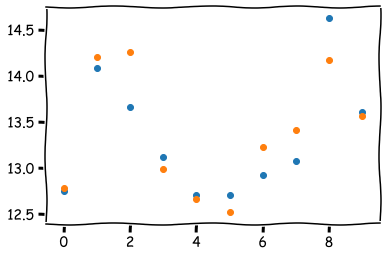

In [73]:
with plt.xkcd():
    plt.scatter(range(len(y_test[:10])), y_test[:10])
    plt.scatter(range(len(y_pred[:10])), y_pred[:10])


In [85]:
X_test

,sqft_living,sqft_lot,view,condition,grade,sqft_above,yr_renovated,zipcode,lat,long,sqft_living15
945,0.391846,0.528379,0.0,1.00,0.3,0.420481,0.0,0.888889,0.973621,0.130399,0.601302
12019,0.675306,0.447377,0.0,0.50,0.8,0.628560,0.0,1.000000,0.822422,0.091362,0.745561
8952,0.756725,0.544875,1.0,0.75,0.5,0.680143,0.0,0.626263,0.917323,0.196844,0.707027
8983,0.419701,0.478676,0.0,0.50,0.4,0.450372,0.0,0.575758,0.852340,0.186047,0.477285
9998,0.394082,0.588913,0.0,0.50,0.4,0.422881,0.0,0.136364,0.975229,0.212625,0.491766
...,...,...,...,...,...,...,...,...,...,...,...
19201,0.561101,0.523383,0.0,0.50,0.4,0.413175,0.0,0.015152,0.750684,0.260797,0.523472
4649,0.285399,0.367784,0.0,0.75,0.3,0.306256,0.0,0.590909,0.635516,0.201827,0.409871
18927,0.693267,0.810362,0.0,0.50,0.7,0.556309,0.0,0.151515,0.392955,0.250831,0.675552
17364,0.475627,0.604737,0.0,0.50,0.4,0.347942,0.0,0.010101,0.164227,0.177741,0.546990


In [87]:
X_test.loc[[945, 12019, 8952, 9998]]

,sqft_living,sqft_lot,view,condition,grade,sqft_above,yr_renovated,zipcode,lat,long,sqft_living15
945,0.391846,0.528379,0.0,1.00,0.3,0.420481,0.0,0.888889,0.973621,0.130399,0.601302
12019,0.675306,0.447377,0.0,0.50,0.8,0.628560,0.0,1.000000,0.822422,0.091362,0.745561
8952,0.756725,0.544875,1.0,0.75,0.5,0.680143,0.0,0.626263,0.917323,0.196844,0.707027
9998,0.394082,0.588913,0.0,0.50,0.4,0.422881,0.0,0.136364,0.975229,0.212625,0.491766


In [88]:
rand_forest.predict(X_test.loc[[945, 12019, 8952, 9998]])

array([12.78693992, 14.20594081, 14.26009071, 12.66775463])

In [89]:
y_test.loc[[945, 12019, 8952, 9998]]

945      12.752751
12019    14.085538
8952     13.664689
9998     12.706851
Name: price, dtype: float64

In [21]:
X = df[used_cols]
y = df[target]

efs1 = ExhaustiveFeatureSelector(rand_forest, 
           min_features= 8, 
           max_features = 17,
           n_jobs = -1,
           scoring='r2',
           cv=0)

efs1.fit(X, y)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.95
Best subset (indices): (1, 2, 3)
Best subset (corresponding names): ('1', '2', '3')


In [28]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE: %.4f" % mse)
print("R squared: %.4f" % r2)

MAE: 0.0000
R squared: 1.0000
